
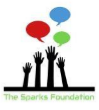




**The Sparks Foundation Graduate Rotational Internship Program**

**Task # 2 - To Explore Supervised Machine Learning**
                                  -by Kartikeya

---


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing required libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
from tkinter import *
import seaborn as sns

In [2]:
# Fetching the data
data_link = "http://bit.ly/w-data"
df = pd.read_csv(data_link)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
#loading linear regression modules
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#assigning X and Y variables
X = df.iloc[:, :-1].values
Y = df.iloc[:,1].values

In [6]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [7]:
#training 
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(0, 106.23103074484166)

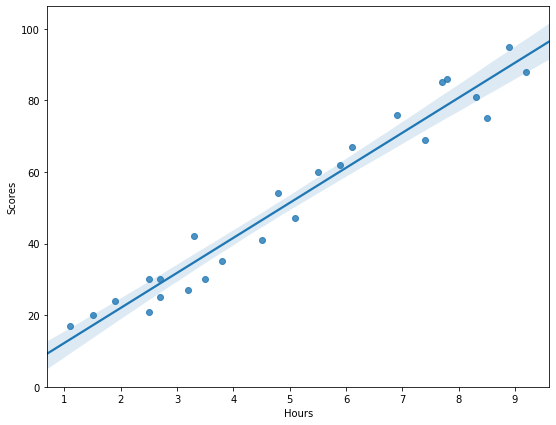

In [8]:
#Plotting Regression line
plt.figure(figsize=(9, 7))
sns.regplot(x="Hours", y="Scores", data=df)
plt.ylim(0,)

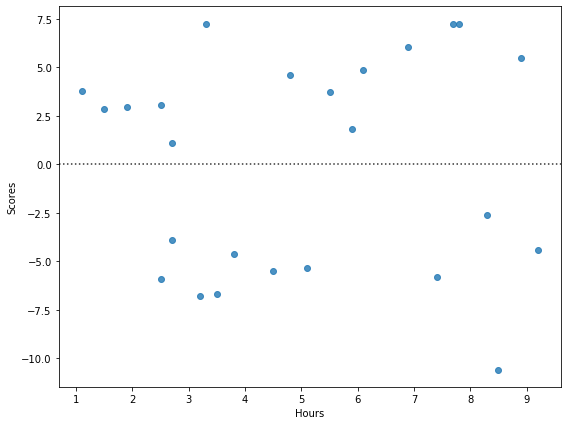

In [9]:
#Visualizing residuals to check fit of the model
width = 9
height = 7
plt.figure(figsize=(width, height))
sns.residplot(df['Hours'], df['Scores'])
plt.show()

In [10]:
#checking Coefficient of determination(R-sqaured)
lm.score(X_train, Y_train)

0.9515510725211553

In [11]:
#making some predictions on test data
Y_pred=lm.predict(X_test)   
#printing test data
print("testing data in hours:\n",X_test)                      

testing data in hours:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df_compare= pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
from sklearn import metrics  
print('Mean Absolute Error of Number of hours studied and predicted score is:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error of Number of hours studied and predicted score is: 4.183859899002975


In [14]:
#Testing with own data
print(lm.predict([[9.25]]))

[93.69173249]


In [33]:
#Creating a GUI
window = Tk()

window.title("Predicting score in exam by number of hours studied")

window.geometry('600x300')

lbl = Label(window, text="Enter the number of hours studied")

lbl.grid(column=0, row=0)

txt = Entry(window,width=10)

txt.grid(column=1, row=0)

def clicked():
    res = "By studying for " + txt.get() +" hours of study you could score: "

    Label(window,bg="yellow", text=lm.predict([[(eval(txt.get()))]])[0]).grid(column=1, row=3)
    ans=Label(window, text=res)
    ans.grid(column=1, row=2)

btn = Button(window,bg="red", text="Predict score in exam", command=clicked)

btn.grid(column=2, row=0)

window.mainloop()